In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

/var/folders/k7/38v84p457m70dh2vksct50j80000gn/T/ipykernel_19939/1856634837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
metrics_binary = './liar_data_metrics_binary_all.csv'

In [4]:
raw_df = pd.read_csv(metrics_binary)

In [5]:
empty_df = pd.DataFrame(columns = raw_df.columns)
empty_row_count = 1
for i in range(empty_row_count):
    empty_df.loc[i, :] = np.nan
empty_df

,Model,Feature_Extraction_Method,Train_Accuracy,Validation_Accuracy,Test_Accuracy,Train_F1,Validation_F1,Test_F1,Train_Precision,Validation_Precision,Test_Precision,Train_Recall,Validation_Recall,Test_Recall,Train_AUC,Validation_AUC,Test_AUC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Add empty rows for better formating
dflist = []
feat_ext_meth = list(raw_df['Feature_Extraction_Method'].unique())
feat_ext_count = len(feat_ext_meth)
for i in range(feat_ext_count):
    if i!=0:
        dflist.append(empty_df)
    f = feat_ext_meth[i]
    exp_set = raw_df[raw_df['Feature_Extraction_Method']==f].copy()
    dflist.append(exp_set)
    if i!= feat_ext_count-1:
        dflist.append(empty_df)
df_with_padding = pd.concat(dflist, ignore_index=True)

/var/folders/k7/38v84p457m70dh2vksct50j80000gn/T/ipykernel_19939/3244565297.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_with_padding = pd.concat(dflist, ignore_index=True)


In [7]:
df_with_padding

,Model,Feature_Extraction_Method,Train_Accuracy,Validation_Accuracy,Test_Accuracy,Train_F1,Validation_F1,Test_F1,Train_Precision,Validation_Precision,Test_Precision,Train_Recall,Validation_Recall,Test_Recall,Train_AUC,Validation_AUC,Test_AUC
0,Logistic Regression,Bag of Words,0.871777,0.596573,0.602999,0.872167,0.595941,0.599810,0.871777,0.596573,0.602999,0.871178,0.594368,0.600644,0.866060,0.593636,0.591896
1,Decision Tree,Bag of Words,0.853613,0.559190,0.579321,0.879909,0.562282,0.567692,0.853613,0.559190,0.579321,0.847919,0.536140,0.554986,0.834003,0.550252,0.549888
2,Random Forest,Bag of Words,0.941895,0.603583,0.601421,0.946788,0.616208,0.595610,0.941895,0.603583,0.601421,0.941300,0.583314,0.573108,0.934055,0.594812,0.569496
3,SVM,Bag of Words,0.911133,0.614486,0.624309,0.912833,0.618862,0.619626,0.911133,0.614486,0.624309,0.910557,0.605292,0.610699,0.904886,0.608450,0.601222
4,KNN,Bag of Words,0.618164,0.529595,0.536701,0.653439,0.542790,0.569510,0.618164,0.529595,0.536701,0.613950,0.515660,0.529331,0.635245,0.536594,0.555499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,KNN,glove.840B.300d_sum,0.636426,0.563863,0.595896,0.634079,0.565559,0.587652,0.636426,0.563863,0.595896,0.622284,0.547289,0.575121,0.613455,0.556196,0.568264
115,Gaussian NB,glove.840B.300d_sum,0.582520,0.588785,0.595896,0.585872,0.588284,0.598751,0.582520,0.588785,0.595896,0.583689,0.588328,0.596946,0.579769,0.587351,0.592526
116,AdaBoost,glove.840B.300d_sum,0.644336,0.573988,0.602210,0.641251,0.576556,0.594883,0.644336,0.573988,0.602210,0.634864,0.559285,0.588072,0.625221,0.566685,0.578963
117,Extra Trees,glove.840B.300d_sum,0.999512,0.601246,0.601421,0.999512,0.608482,0.594149,0.999512,0.601246,0.601421,0.999512,0.586351,0.581423,0.999541,0.593704,0.574185


In [8]:
df_with_padding = df_with_padding.round(2)

In [9]:
models = list(raw_df['Model'])
feat_ext_meth = list(raw_df['Feature_Extraction_Method'].unique())

yticks = []
bar_data = []
for model in df_with_padding['Model']:
    # for model in models:
        # pass
        # label = '<'+str(model) + ', ' + str(f) + '>'
    if pd.isna(model):
        label = ''
    else:
        label = str(model)
    yticks.append(label)
len(yticks)

119

In [9]:
# font_size = 10
# # use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Helvetica'

# fig =plt.figure(figsize=(7,18))
# # fig, ax = plt.subplots()
# ax = plt.gca()
# # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_xlim([0,1])
# ax.set_ylabel('<Model, Feature_Extraction_Method>', fontsize=font_size)
# ax.set_xlabel('Training Accuracy', fontsize=font_size)
# # ax.set_title('EXPAT', fontsize=font_size)

# bar_loc = np.arange(len(df_with_padding))  # the label locations
# bar_loc = bar_loc
# height = 0.5
# # the width of the bars

# ax.set_yticks(bar_loc, yticks, fontsize=font_size, fontweight='bold', ha='right')
# xticks = np.arange(0,1.1,0.1)
# xticks = np.round(xticks, 2)
# ax.set_xticks(xticks,xticks, fontsize=font_size)
# padding = 3

# ## drawing bars from each data
# # for 

# bars = ax.barh(bar_loc, width = df_with_padding['Train_Accuracy'], height=height)
# bar_labels = ax.bar_label(bars, labels=df_with_padding['Train_Accuracy'], color='black', fontsize = font_size, fontweight='bold', label_type='edge')
# fig.tight_layout()
# fig.savefig('training_data_binary.pdf')
# # plt.show()

In [10]:
models = list(raw_df['Model'])
feat_ext_meth = list(raw_df['Feature_Extraction_Method'].unique())

xticks = []
bar_data = []
for model in df_with_padding['Model']:
    # for model in models:
        # pass
        # label = '<'+str(model) + ', ' + str(f) + '>'
    if pd.isna(model):
        label = ''
    else:
        label = str(model)
    xticks.append(label)
len(xticks)

119

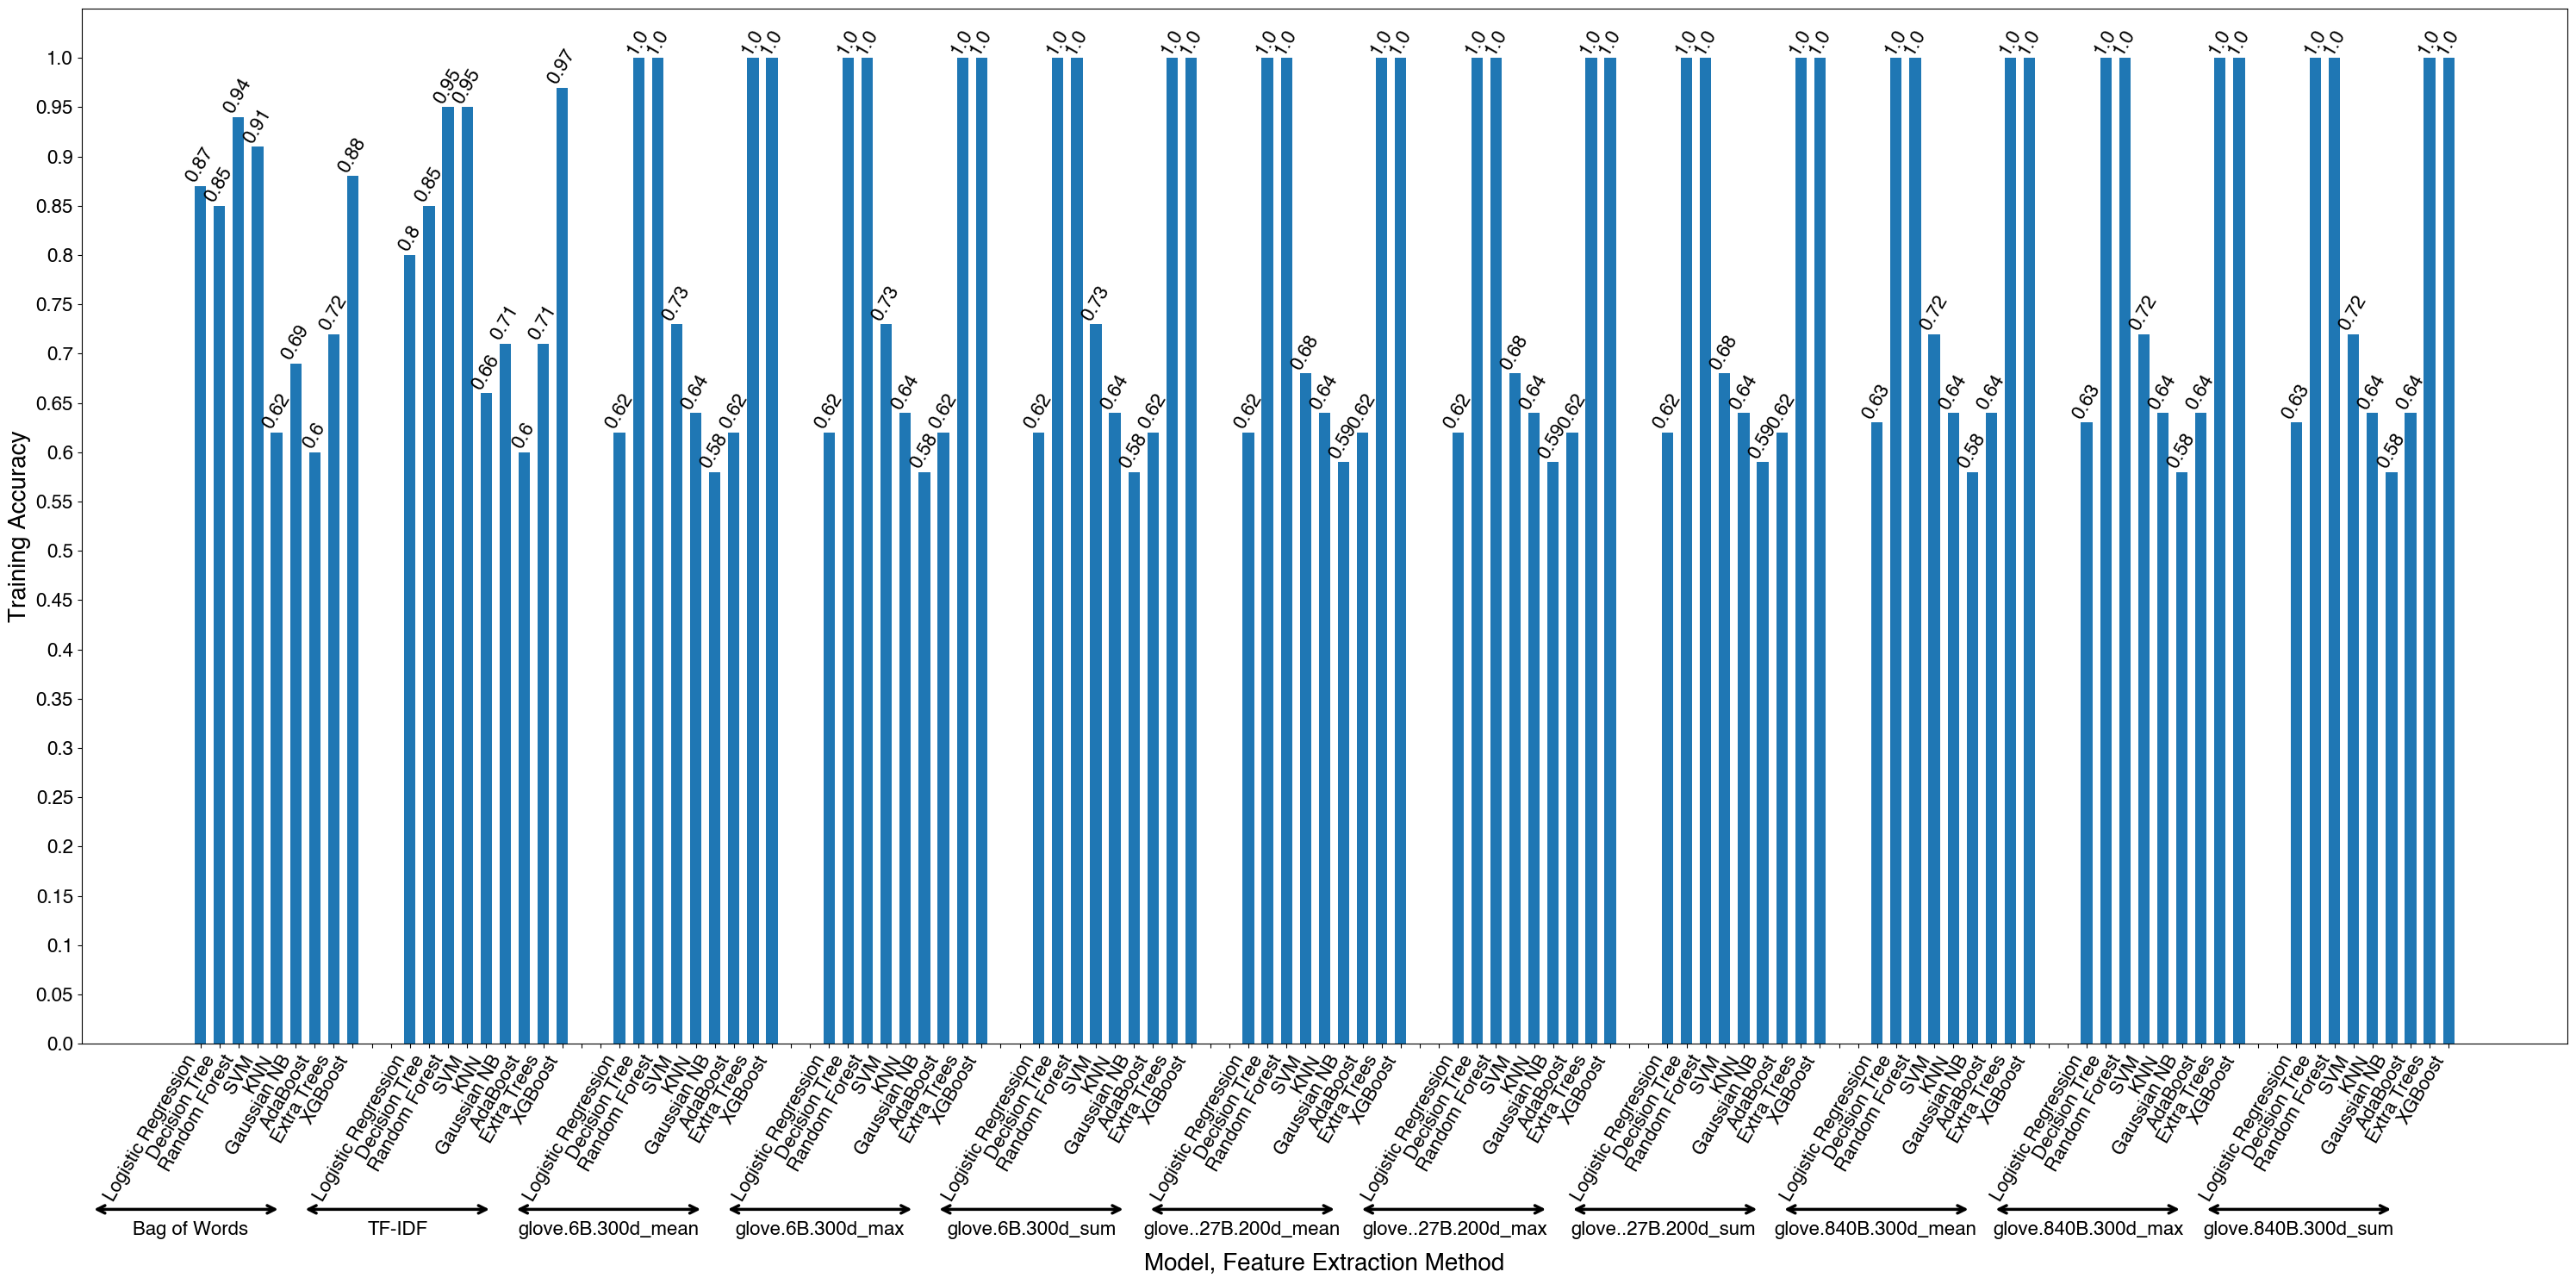

In [11]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=40)
ax.set_ylabel('Training Accuracy',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Train_Accuracy'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Train_Accuracy'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.16
    text_y_offset = 0.02
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_accuracy_train.pdf')
# plt.show()

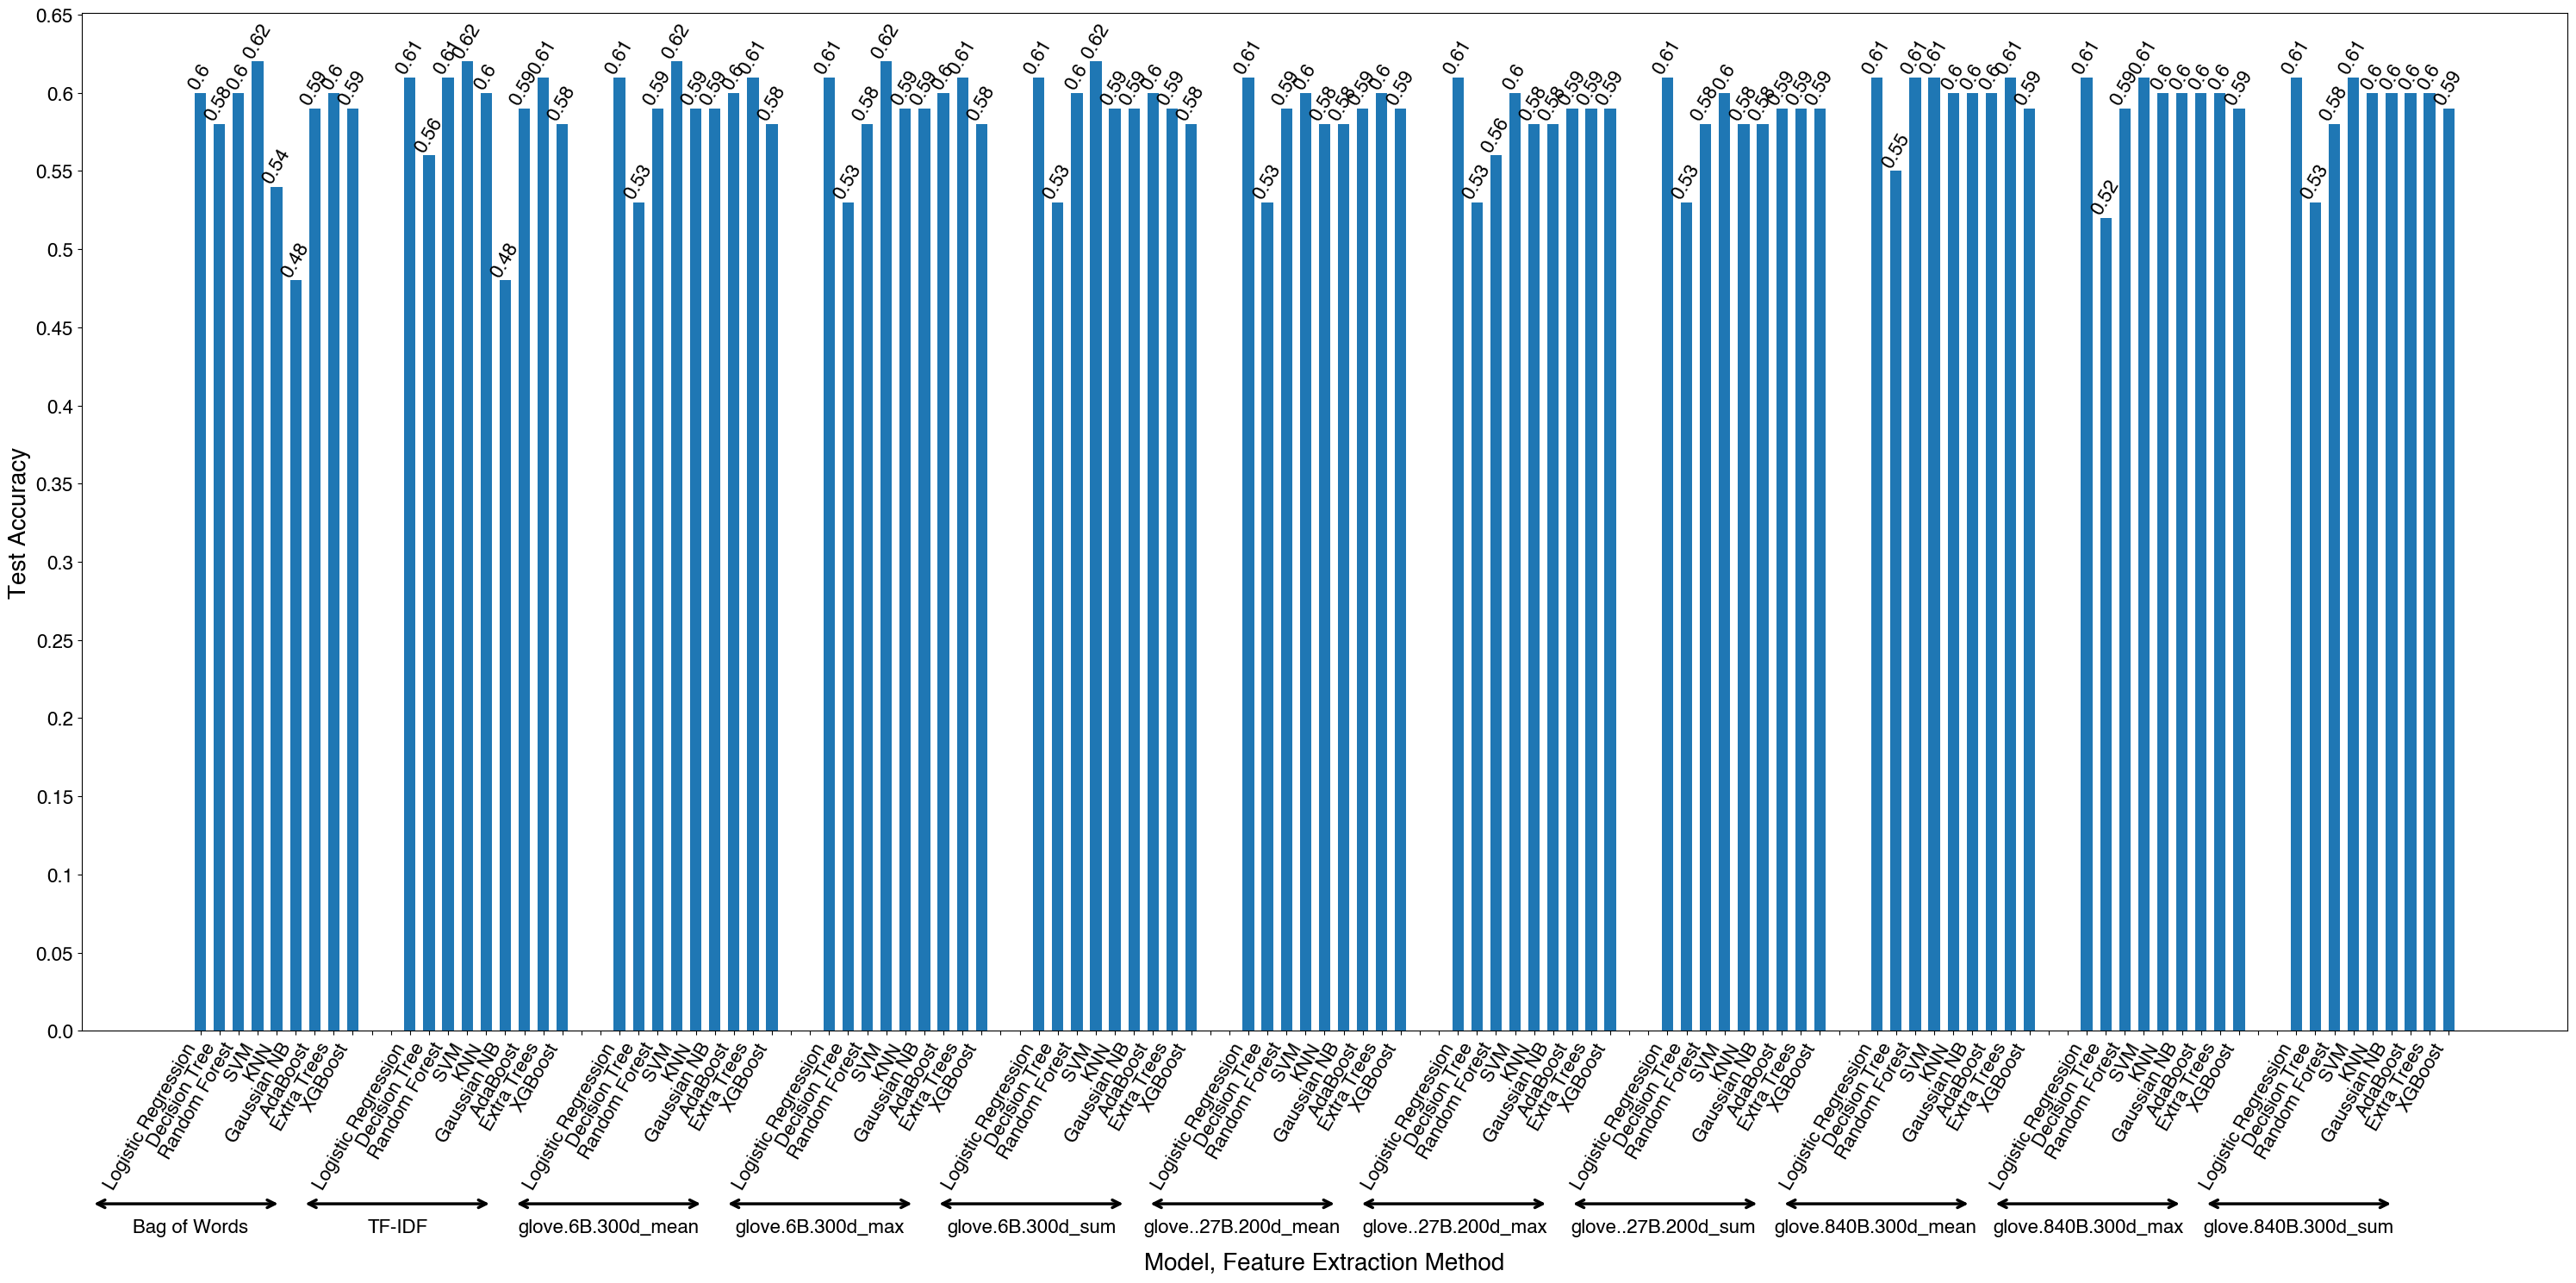

In [12]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Test Accuracy',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Test_Accuracy'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Test_Accuracy'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = -0.05
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_accuracy_test.pdf')
# plt.show()

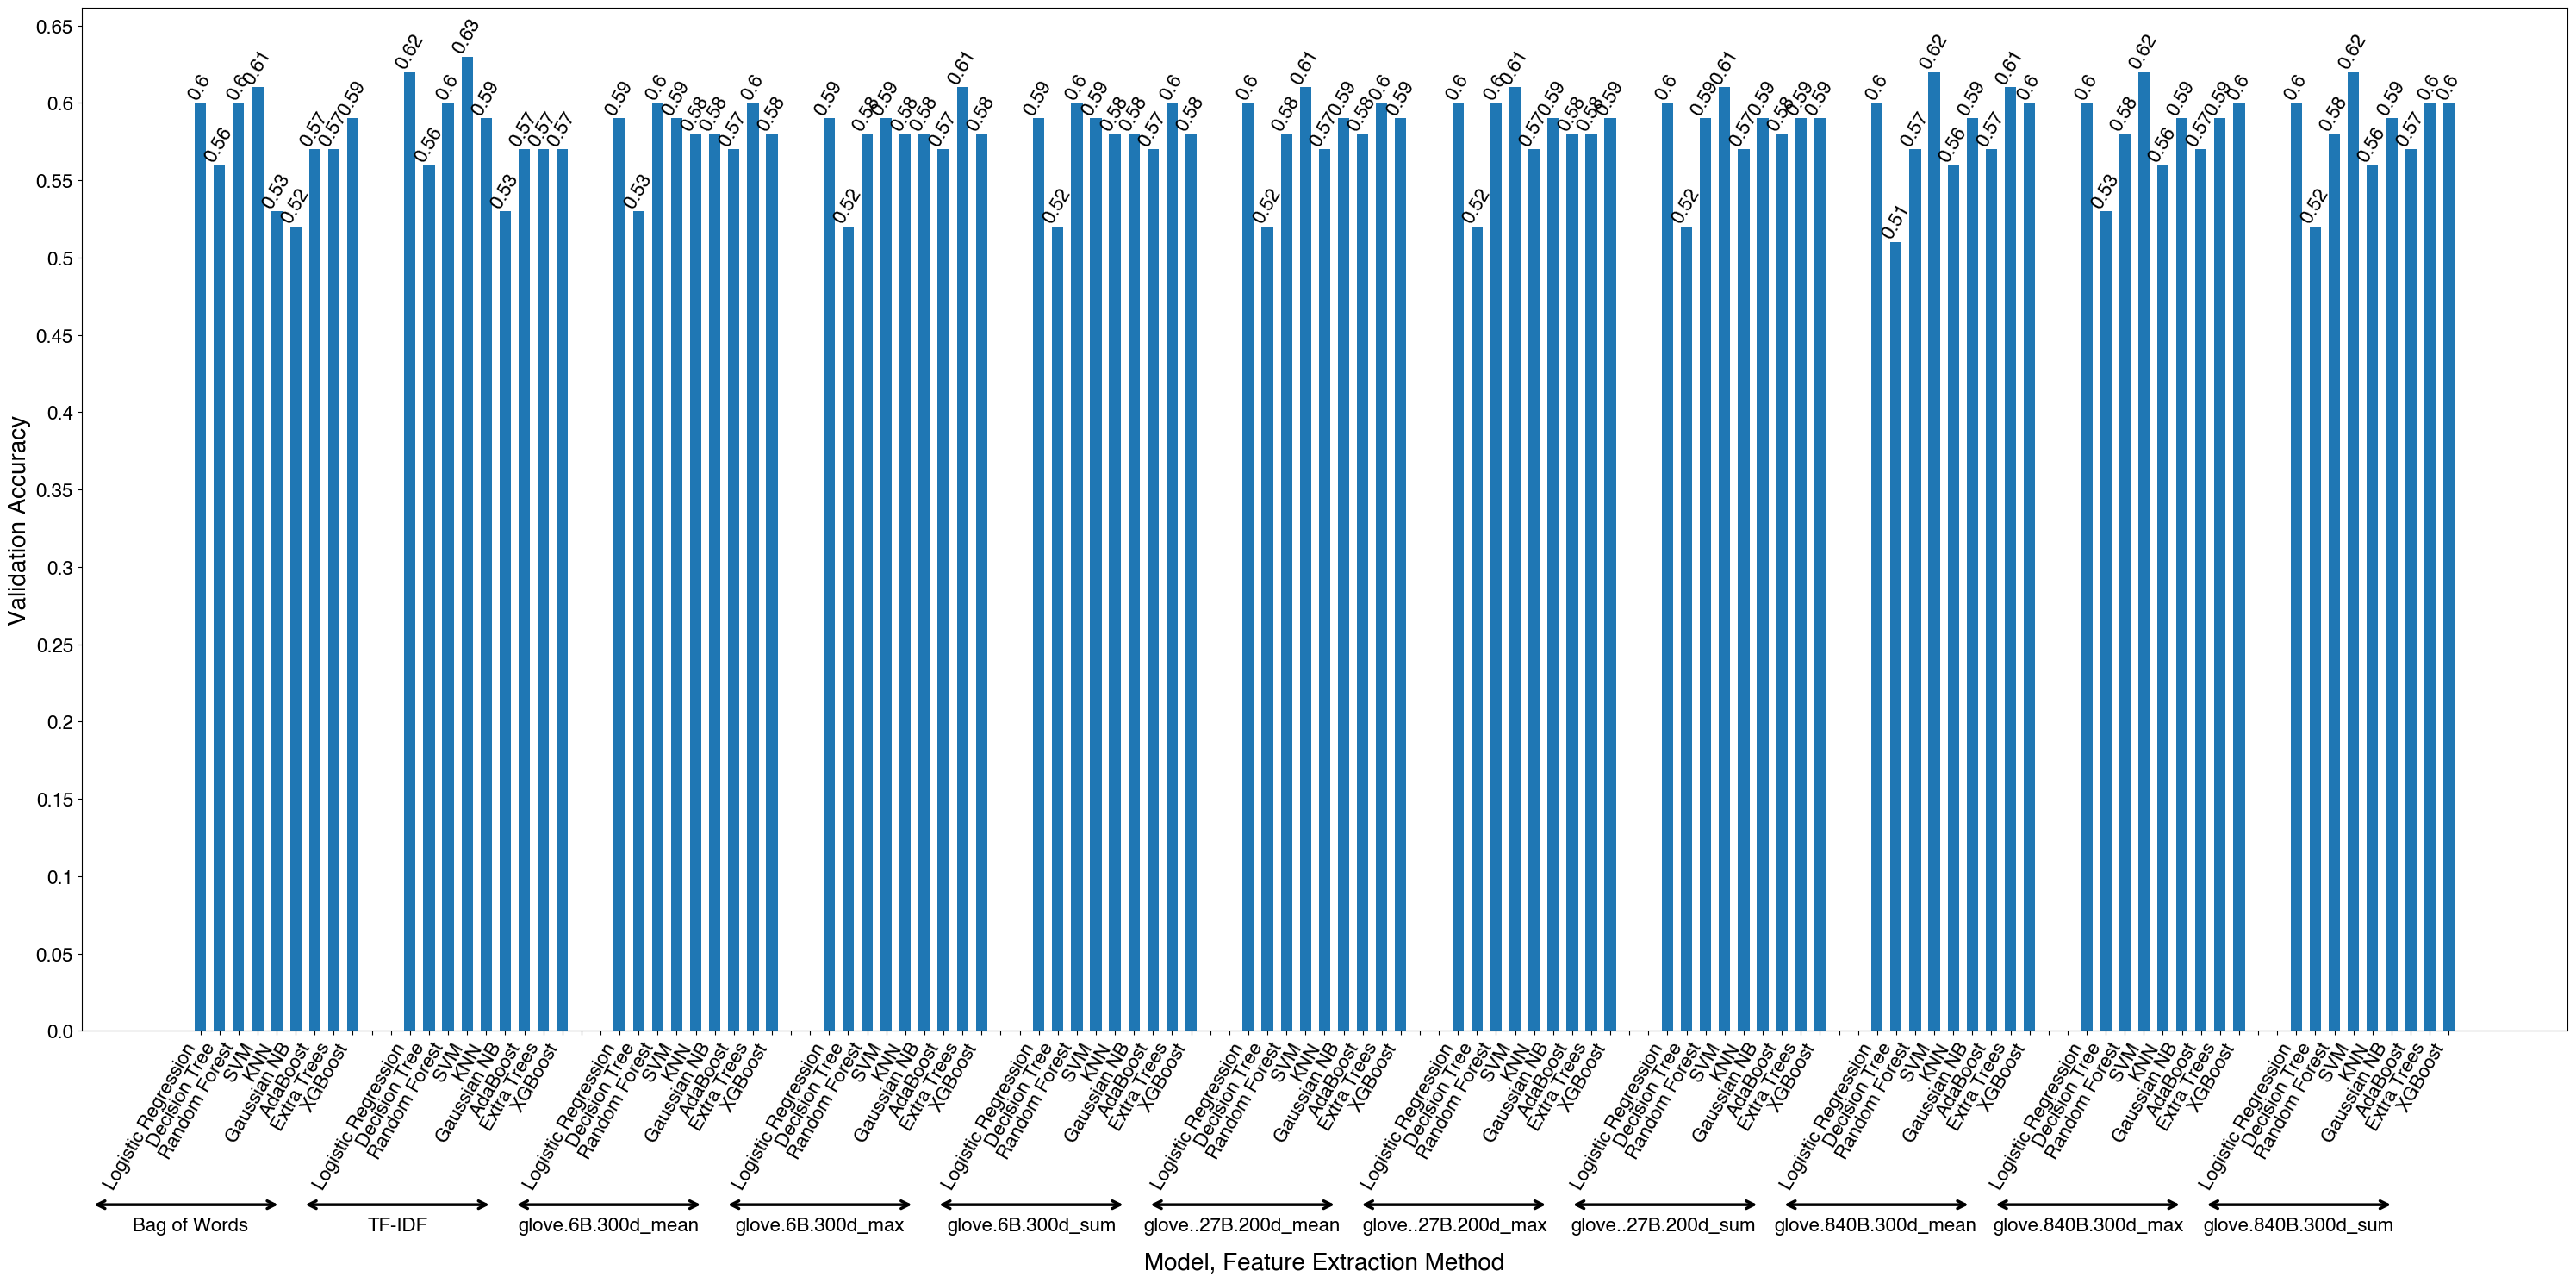

In [13]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Validation Accuracy',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Validation_Accuracy'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Validation_Accuracy'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = -0.05
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_accuracy_validation.pdf')
# plt.show()

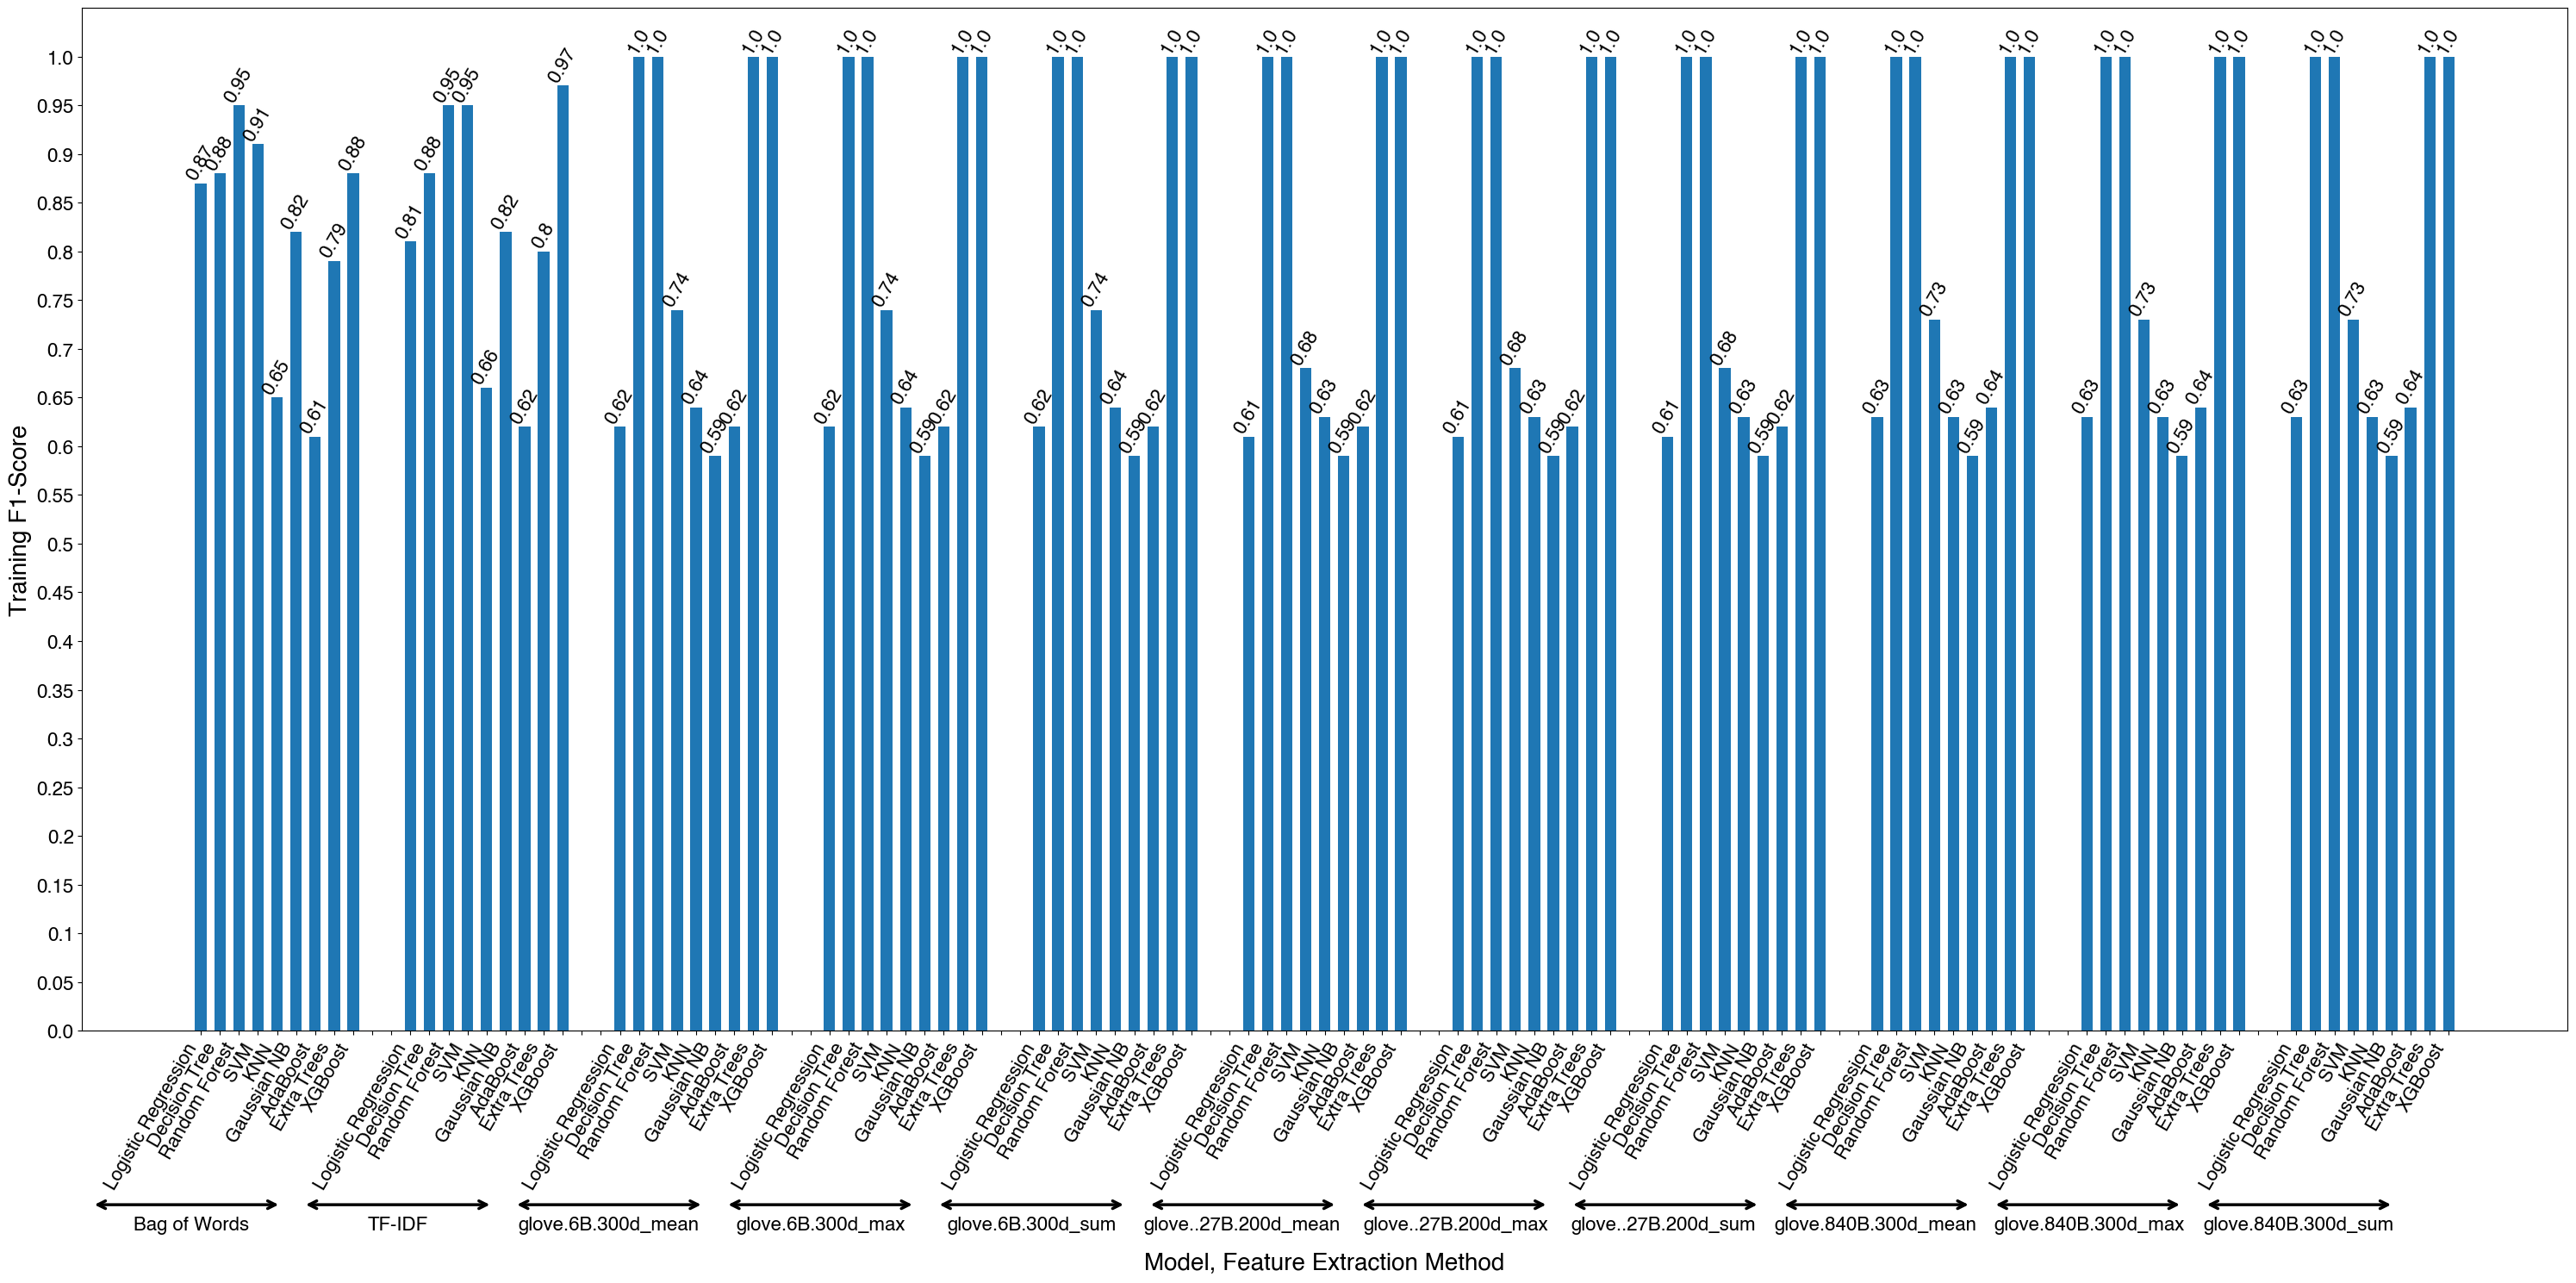

In [14]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Training F1-Score',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Train_F1'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Train_F1'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = 0.02
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_f1_train.pdf')
# plt.show()

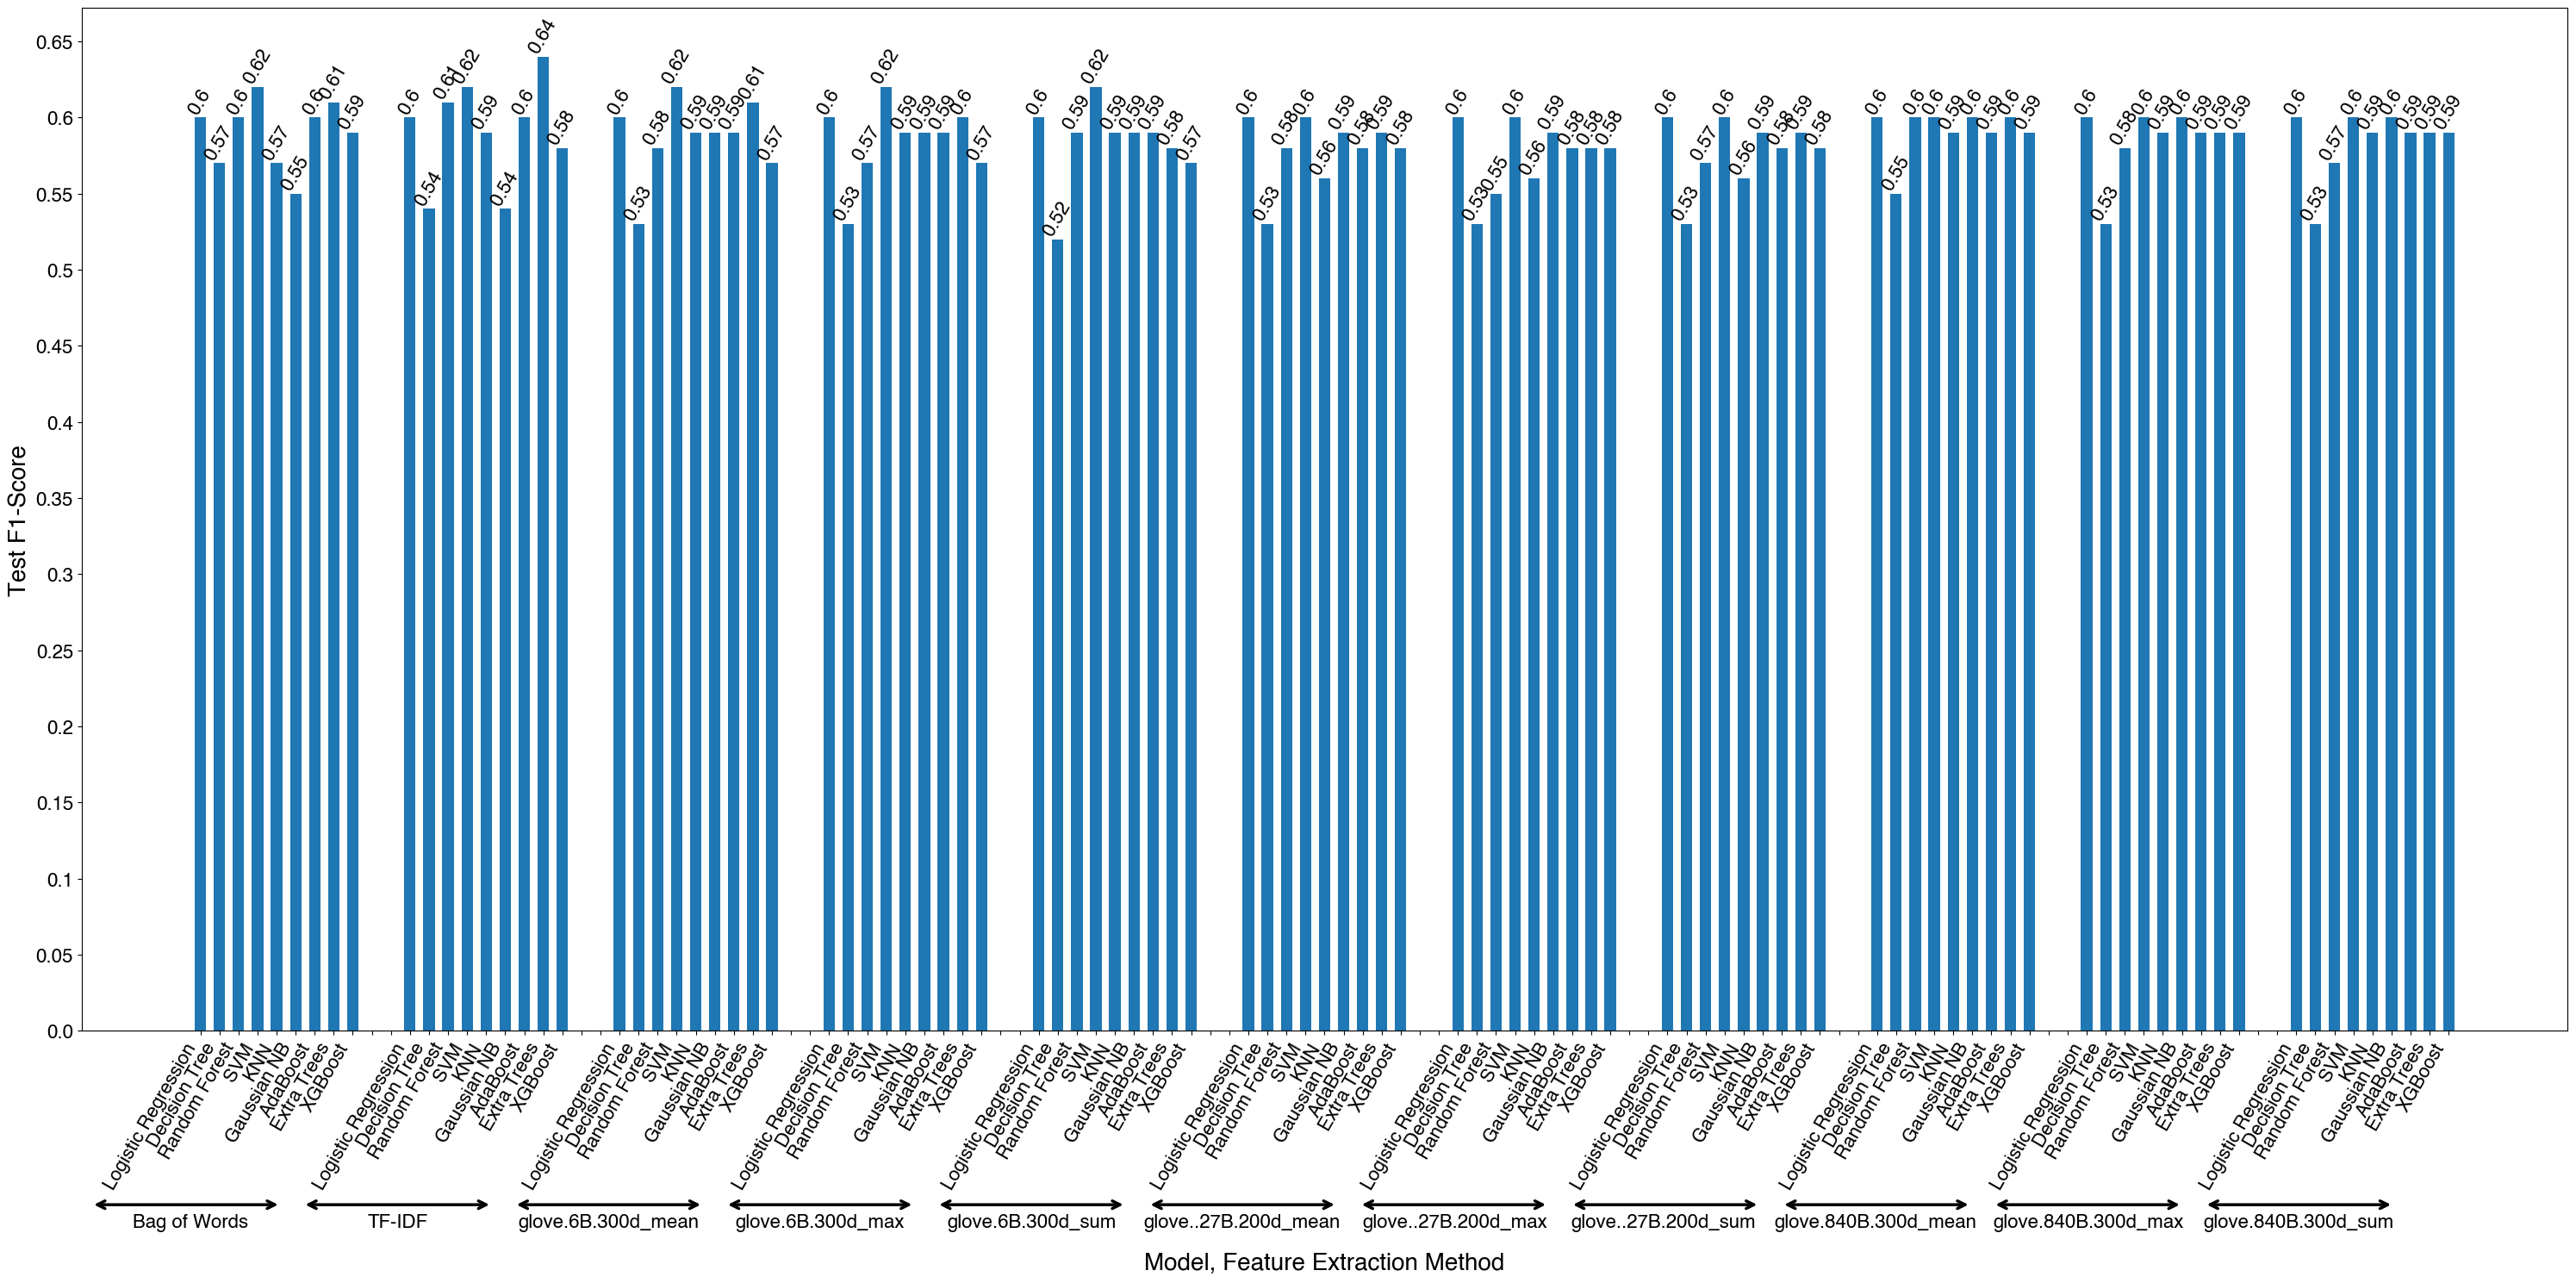

In [15]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Test F1-Score',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Test_F1'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Test_F1'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = -0.05
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_f1_test.pdf')
# plt.show()

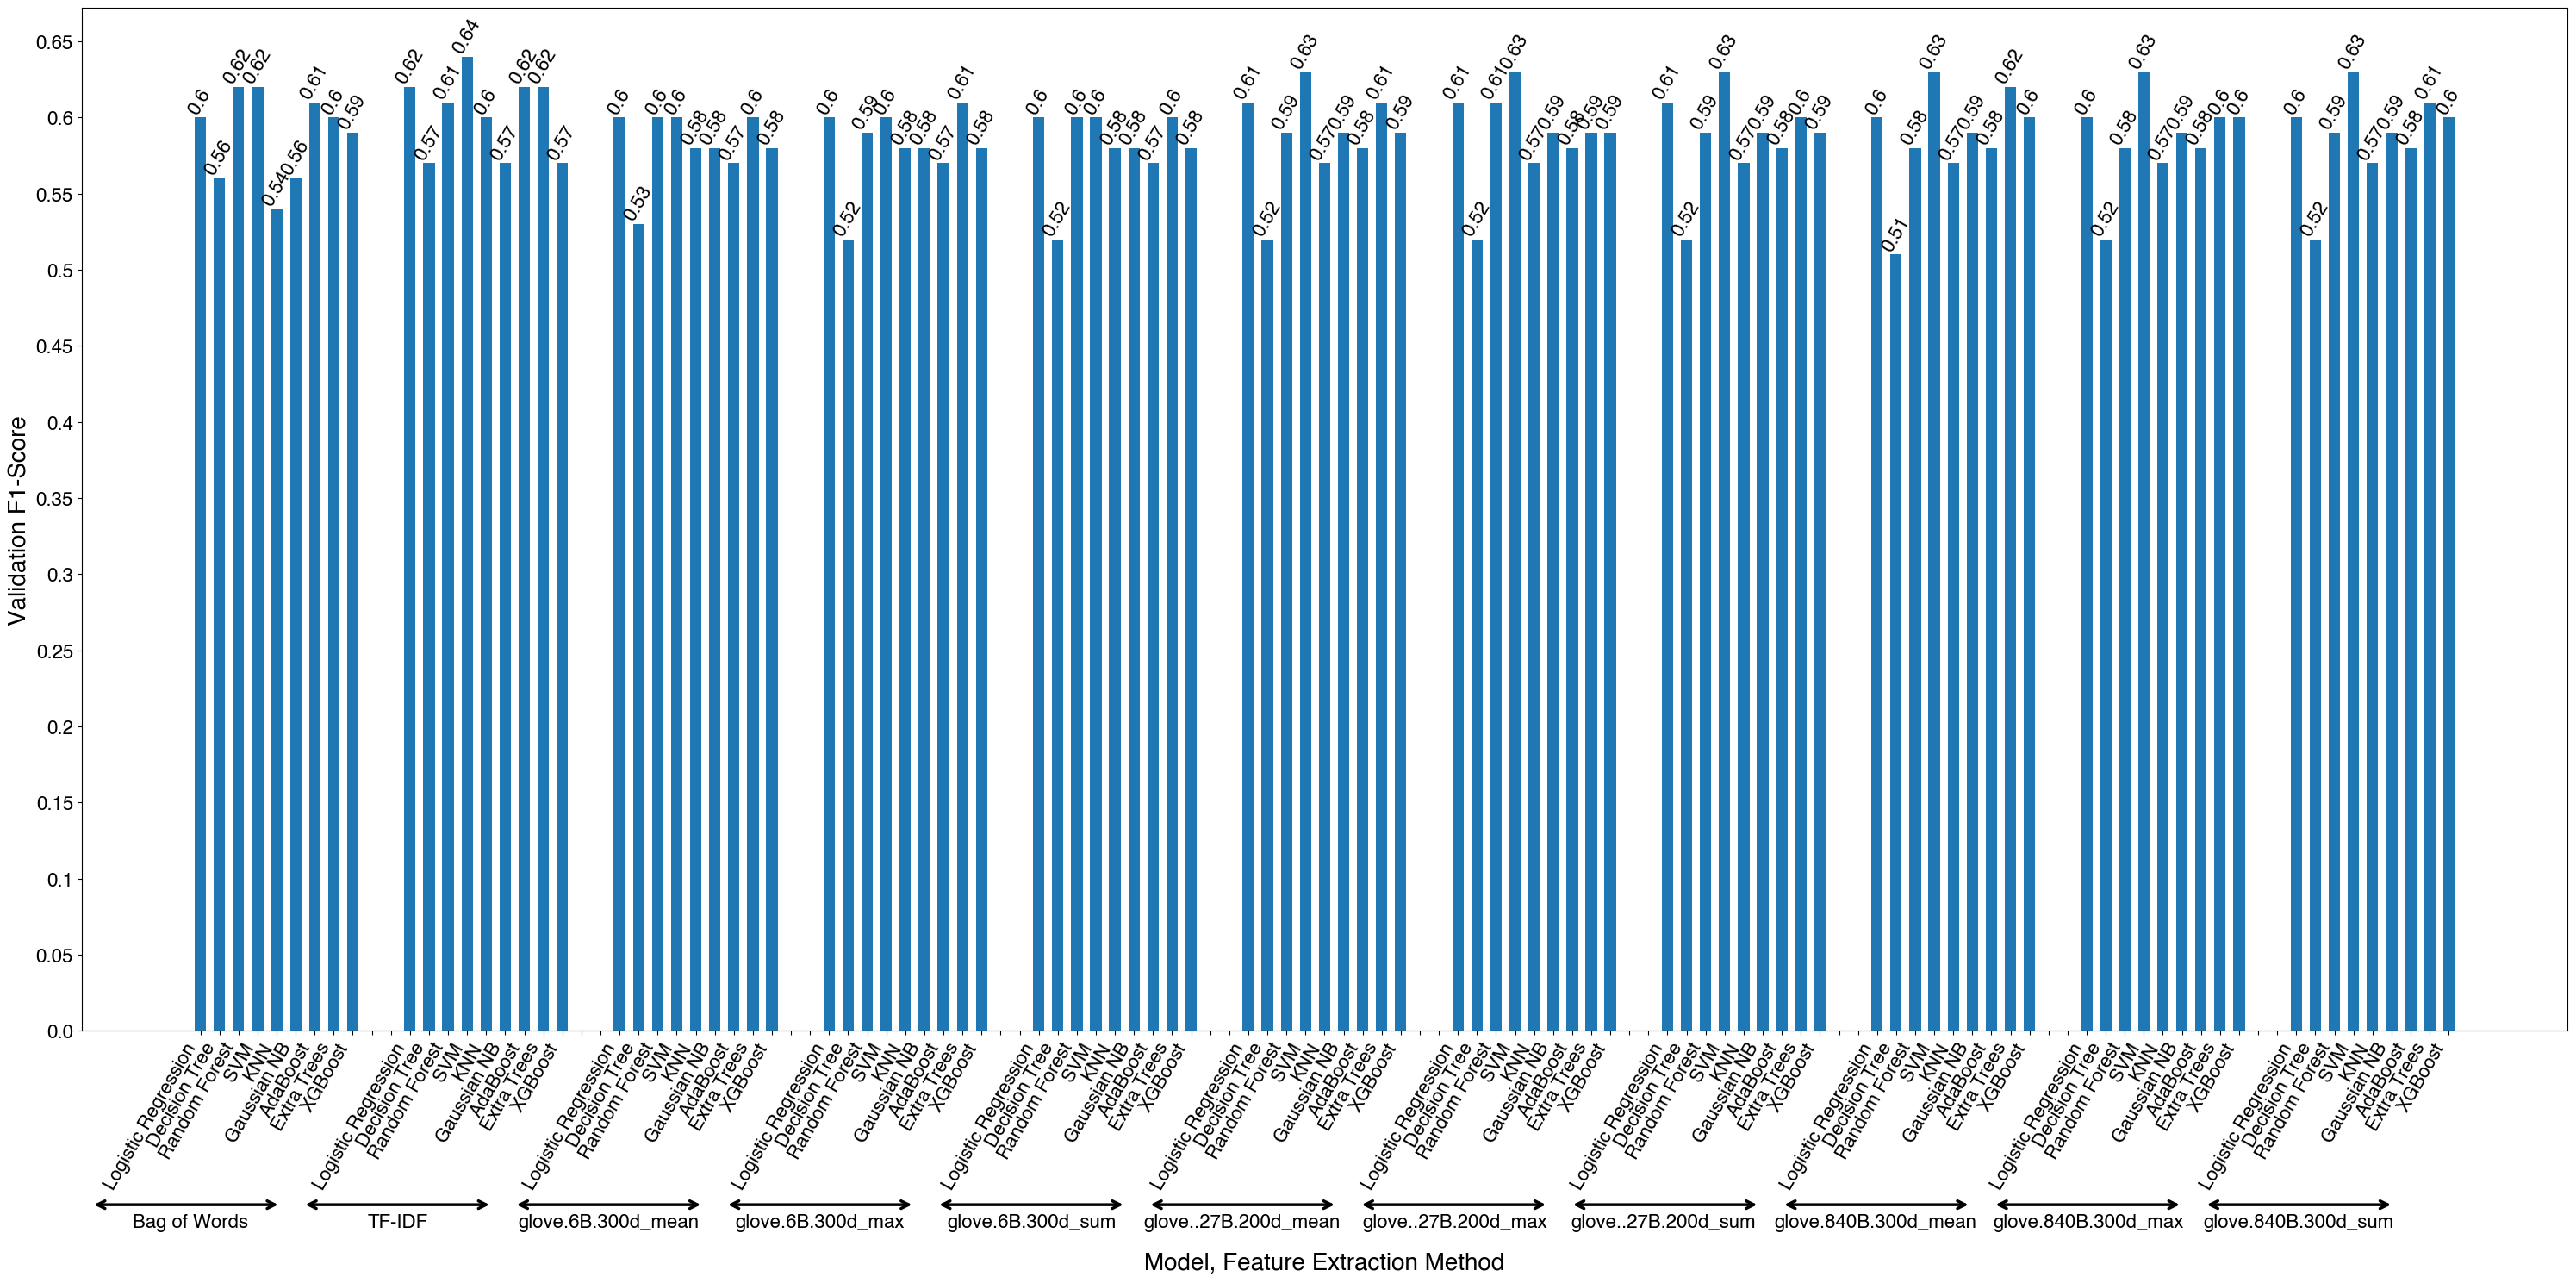

In [16]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Validation F1-Score',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Validation_F1'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Validation_F1'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = -0.05
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_f1_validation.pdf')
# plt.show()

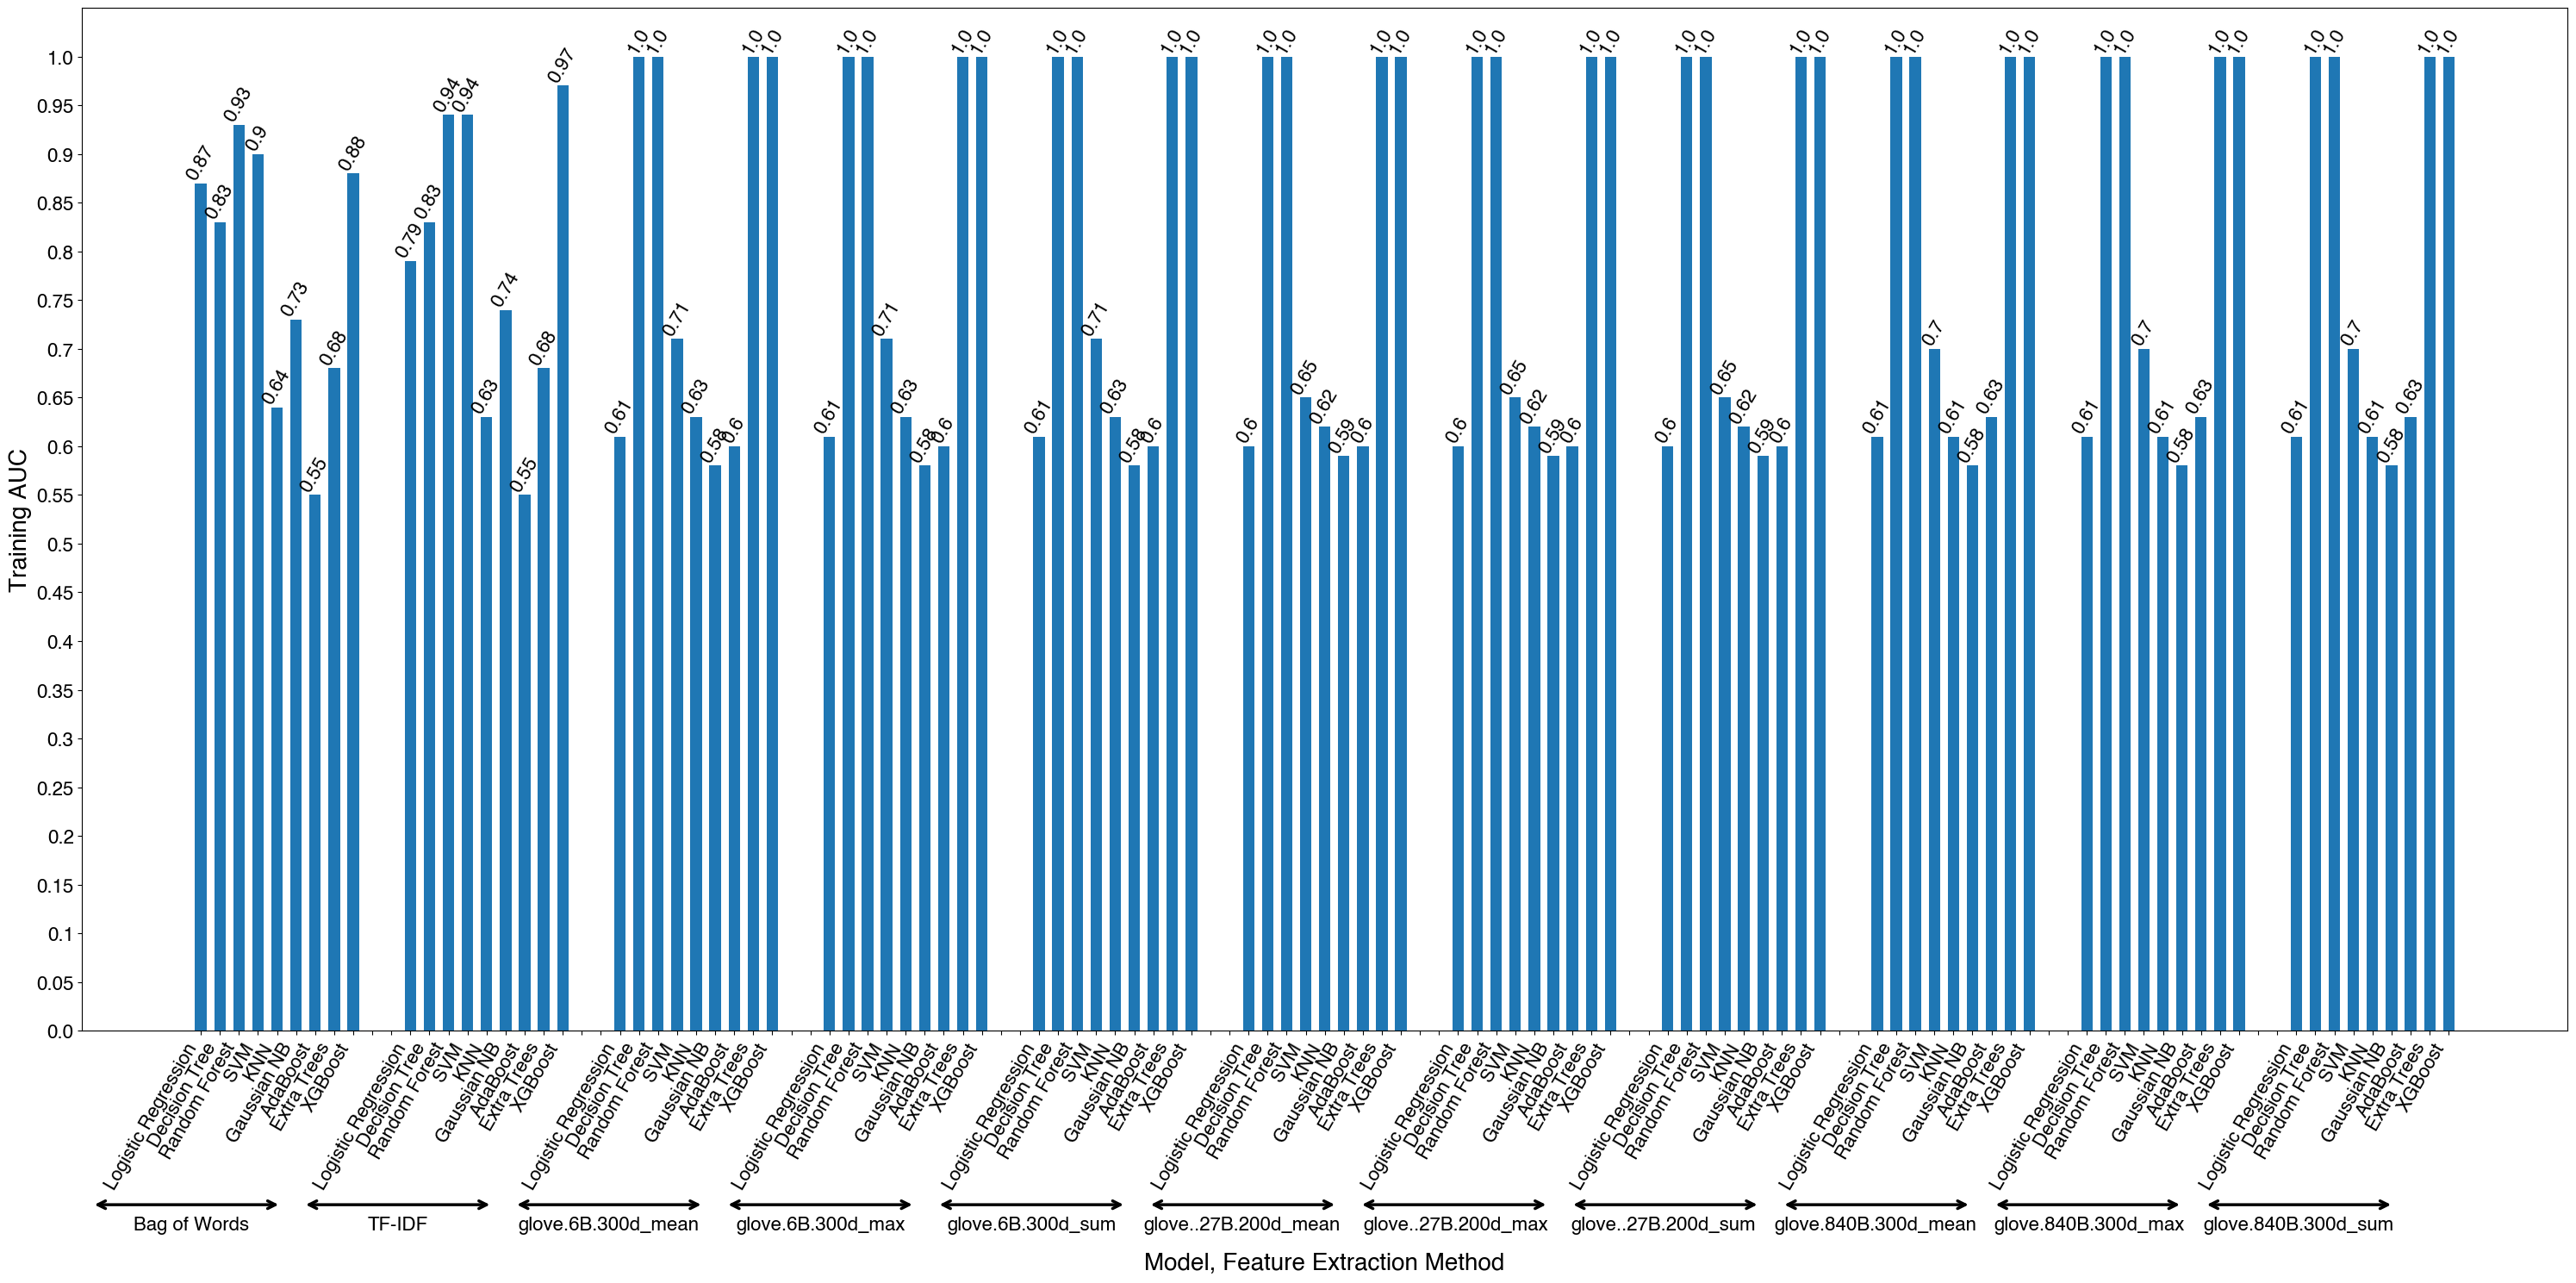

In [17]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Training AUC',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Train_AUC'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Train_AUC'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = 0.02
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_AUC_train.pdf')
# plt.show()

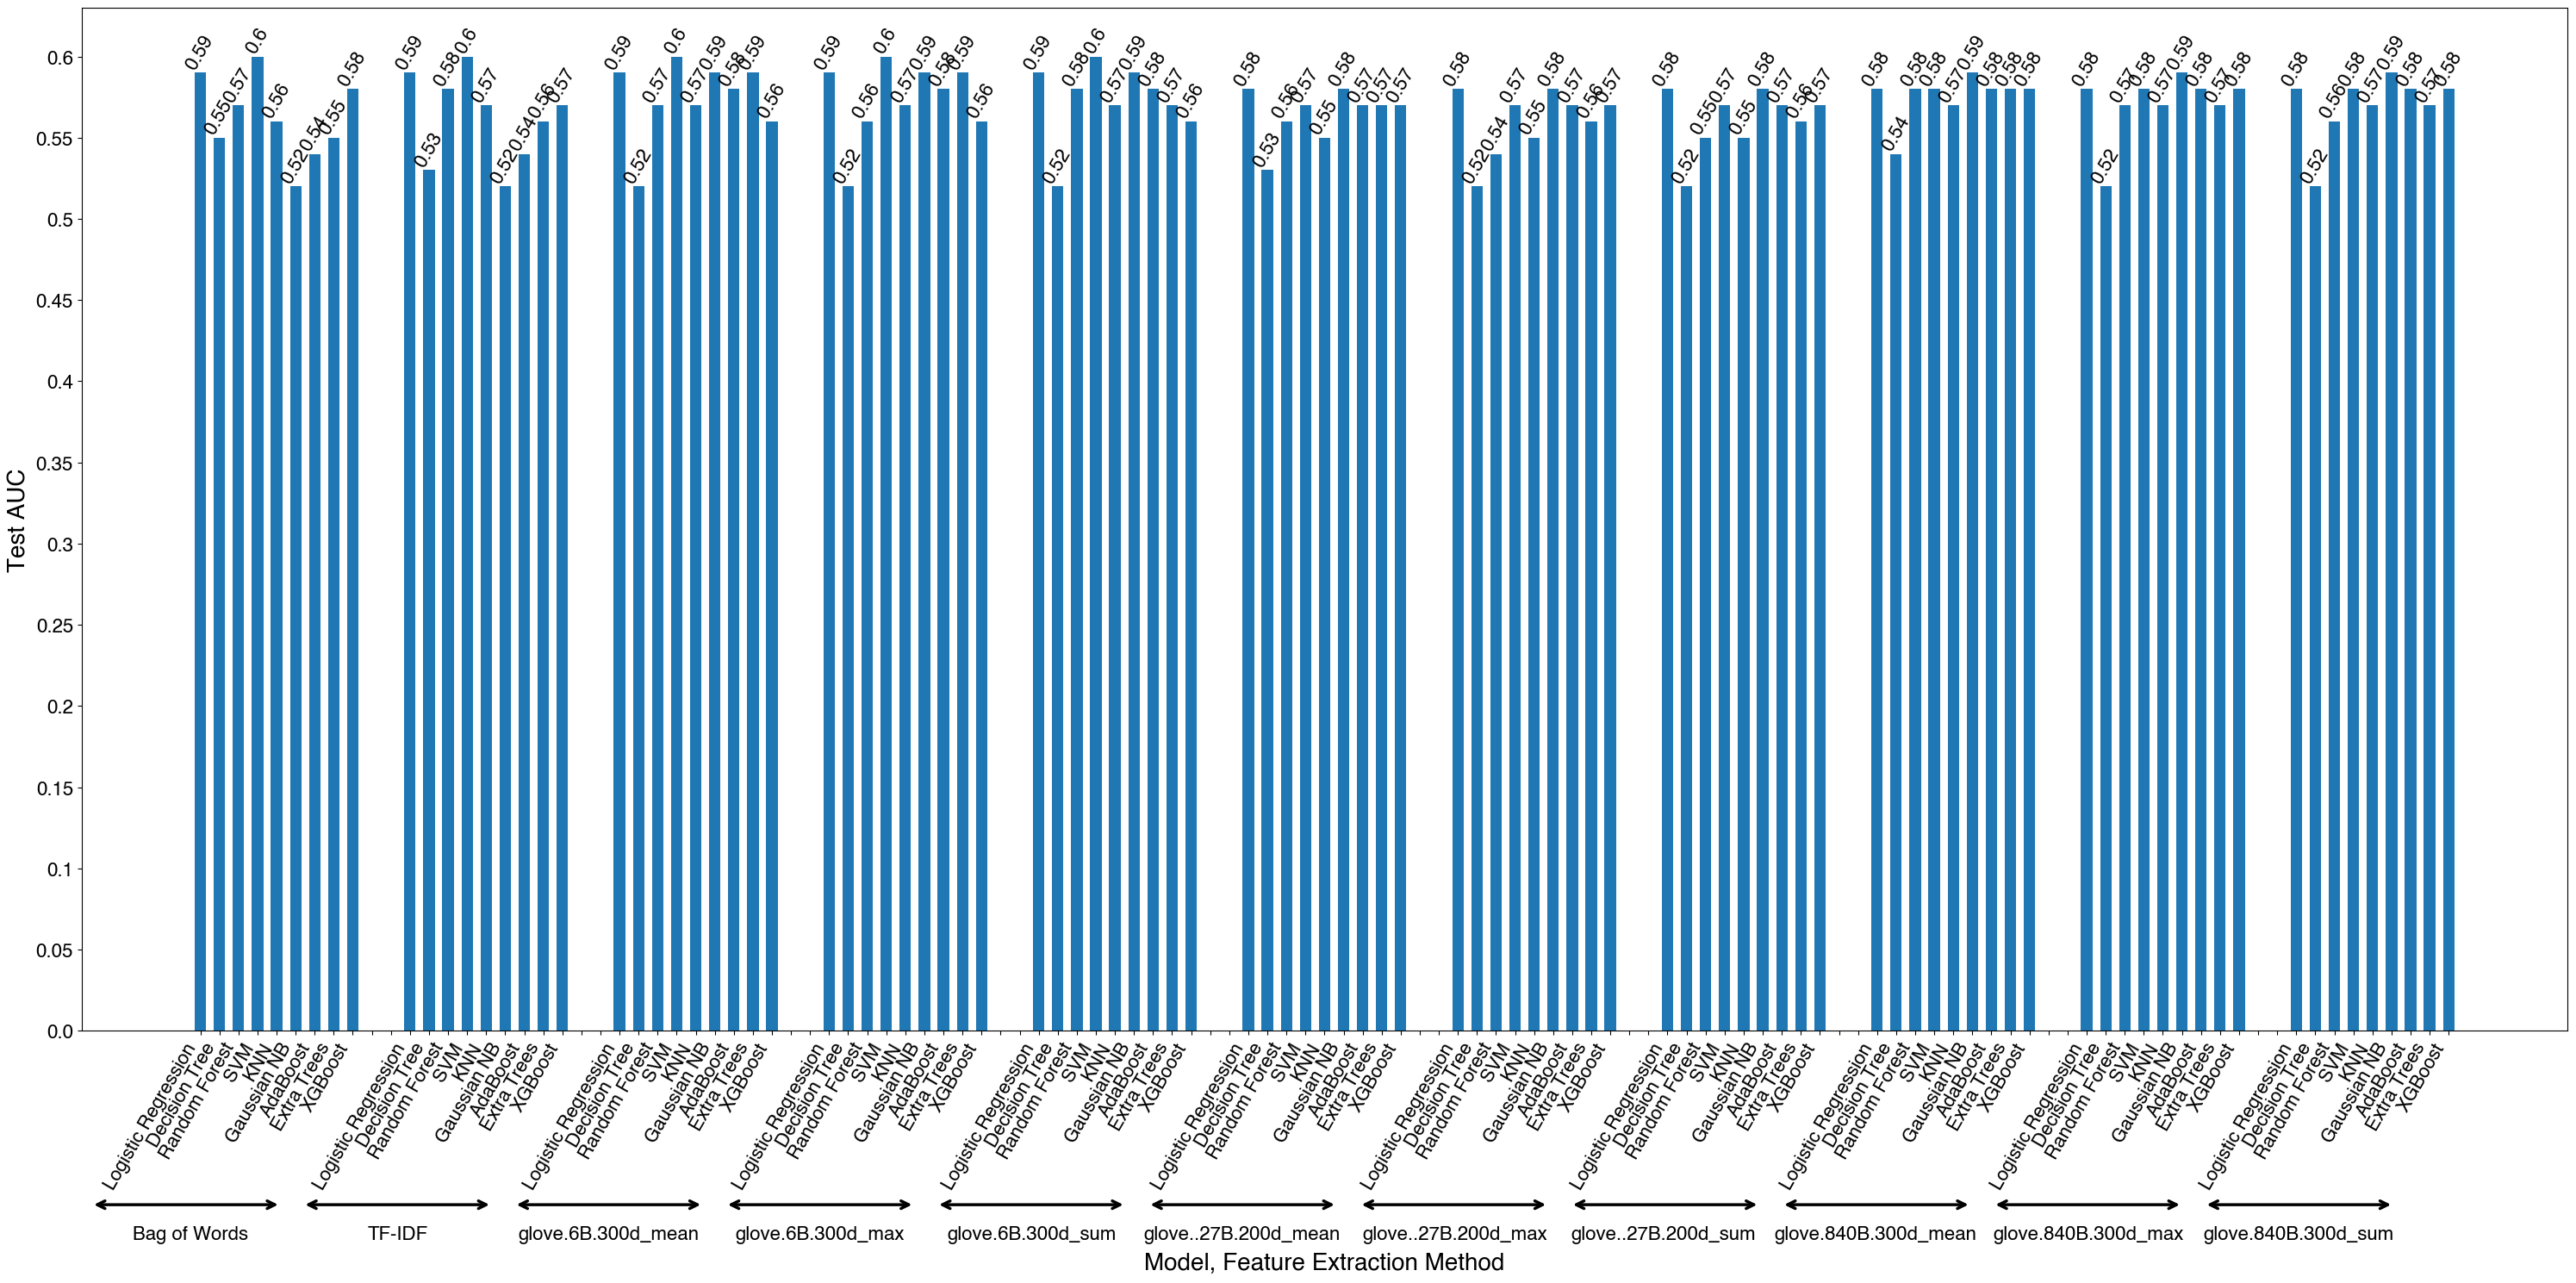

In [18]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Test AUC',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Test_AUC'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Test_AUC'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = -0.05
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_AUC_test.pdf')
# plt.show()

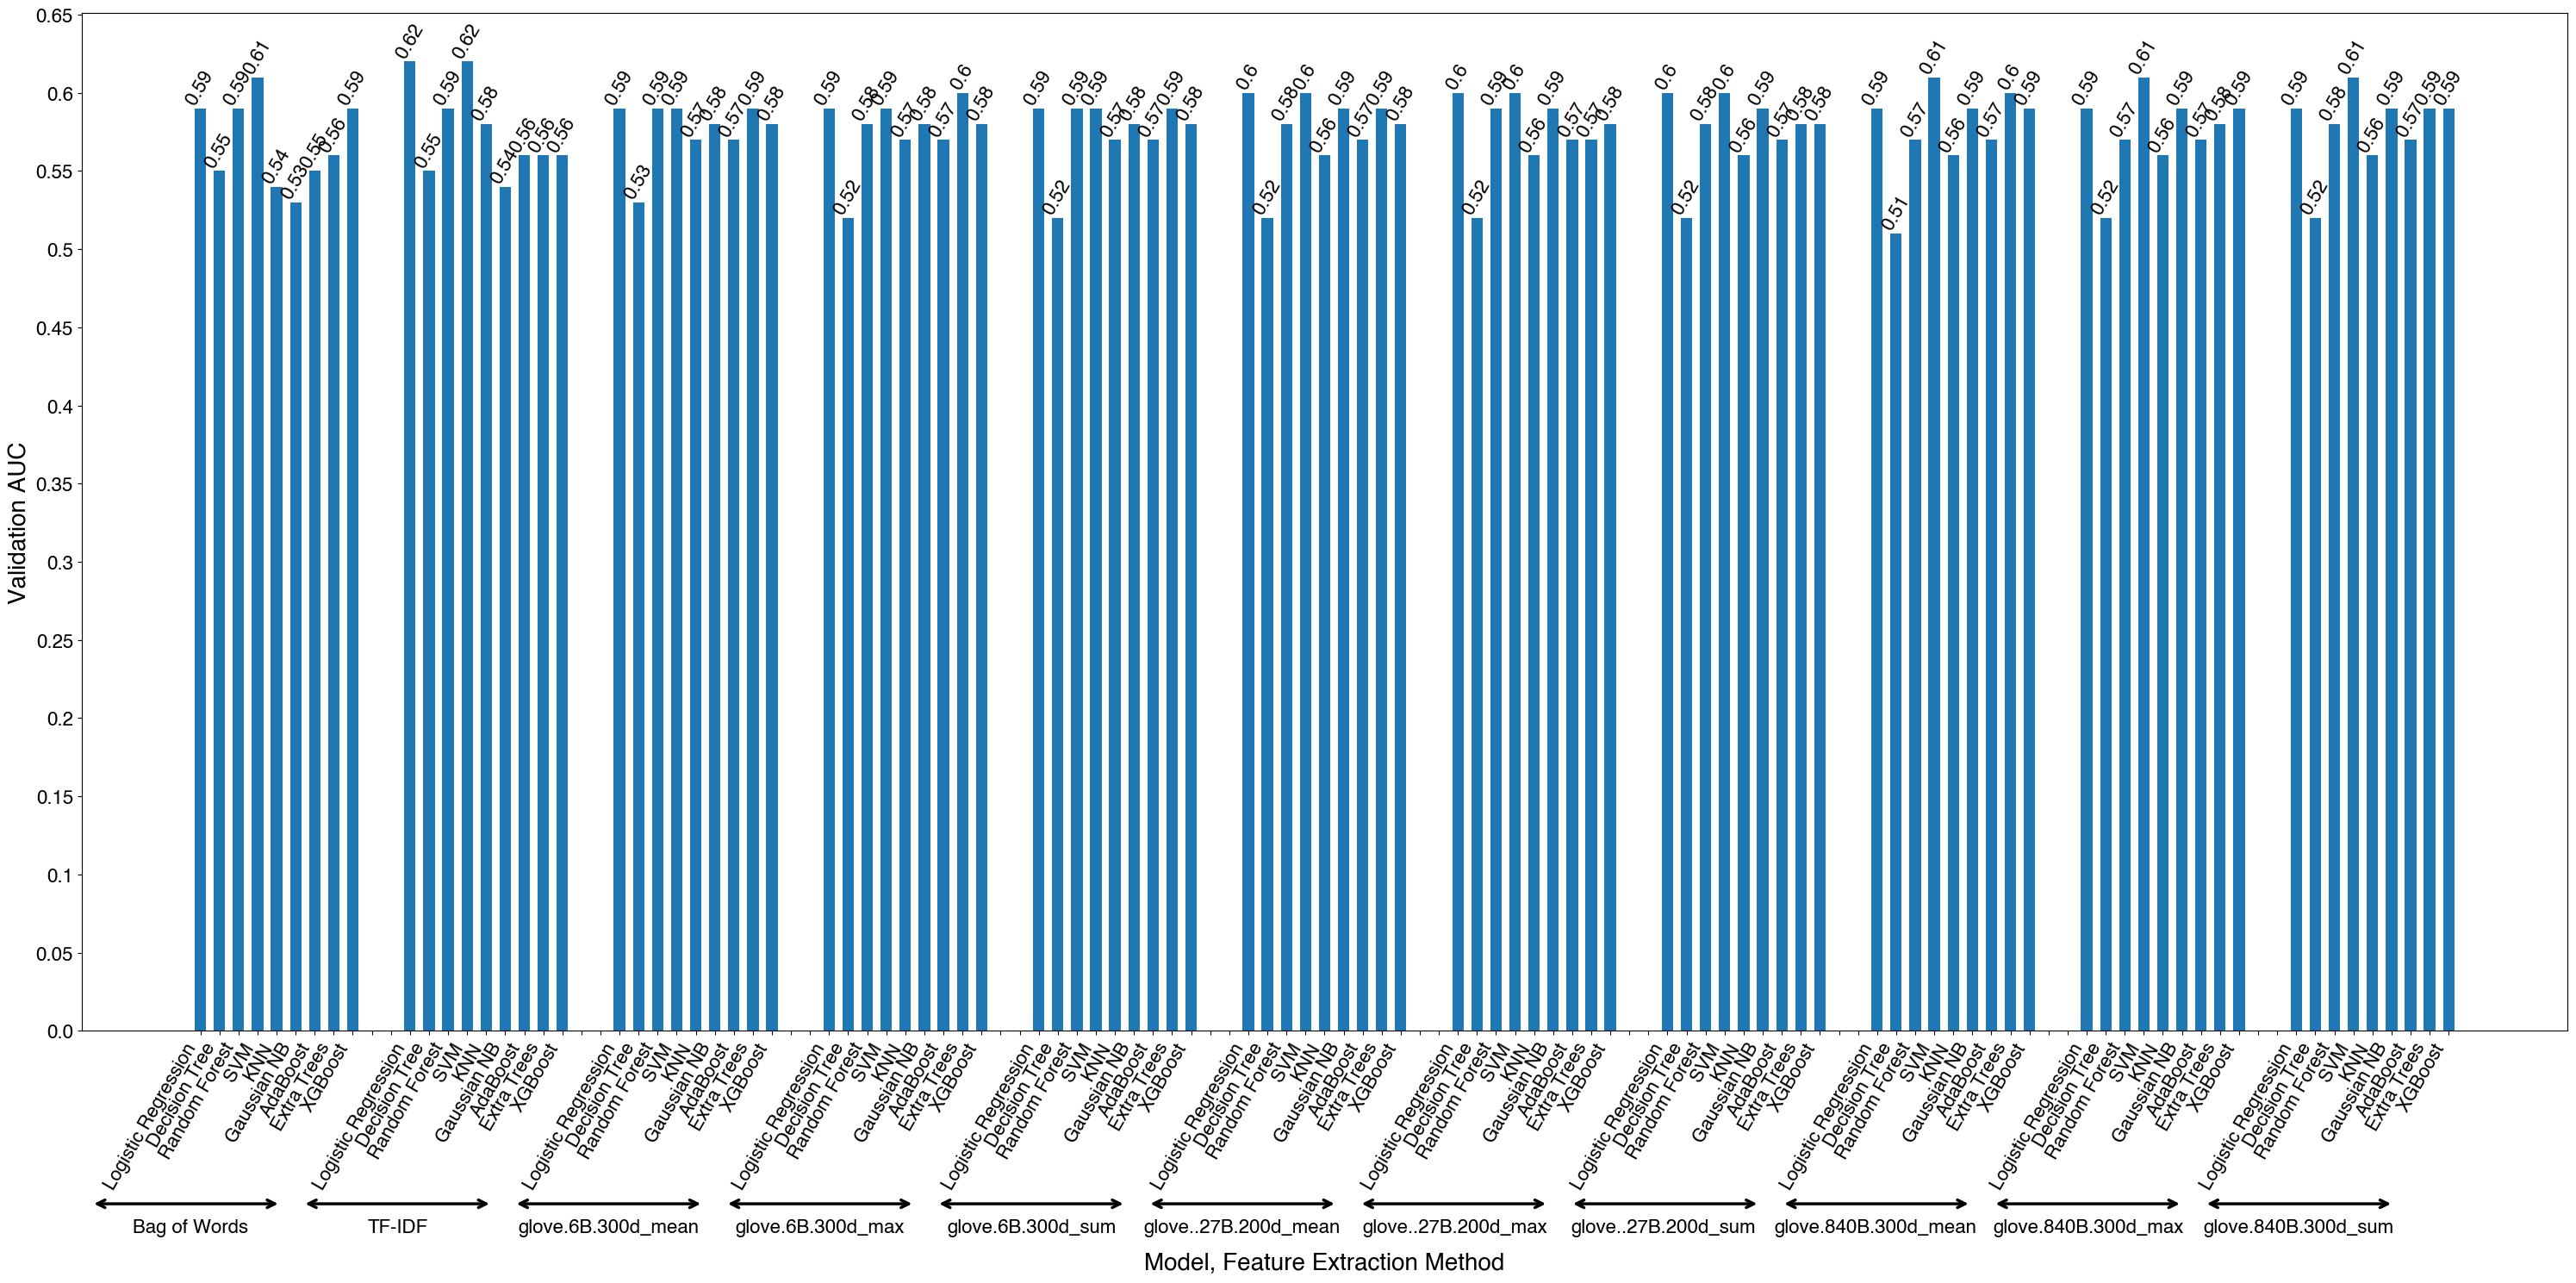

In [19]:
font_size = 20
# use_font =  {'fontname':'Times New Roman', 'fontsize':font_size}
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig = plt.figure(figsize=(30,15))
# fig, ax = plt.subplots()
ax = plt.gca()
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylim([0,1.05])
ax.set_xlabel('Model, Feature Extraction Method', fontsize=font_size, labelpad=50)
ax.set_ylabel('Validation AUC',  fontsize=font_size)
# ax.set_title('EXPAT', fontsize=font_size)

bar_loc = np.arange(len(df_with_padding) )  # the label locations
bar_loc = bar_loc
width = 0.6
# the width of the bars

ax.set_xticks(bar_loc, xticks, fontsize=font_size-4, rotation=60, ha='right')
yticks = np.arange(0,1.05,0.05)
yticks = np.round(yticks, 2)
ax.set_yticks(yticks,yticks, fontsize=font_size-4)
padding = 3

## drawing bars from each data

bars = ax.bar(bar_loc, height = df_with_padding['Validation_AUC'], width=width)
bar_labels = ax.bar_label(bars, labels=df_with_padding['Validation_AUC'], color='black', fontsize = font_size-4, rotation=60, fontweight='bold', label_type='edge')

## Annotate the lower labels with feature extraction methods
# Add an annotation in the label area (axes fraction coordinates)
x_offset_width = 0.085
text_offset_additional_map = [-1, -0.25, 0.7, 1.7, 2.7, 3.6, 4.7, 5.5, 6.5, 7.6, 8.5 ]
for i in range(feat_ext_count):
    feat_ext_method = feat_ext_meth[i]   
    start_x = 0.004 + i*x_offset_width
    end_x = 0.08 + i*x_offset_width
    
    # Specify the y-position for the bracket in data coordinates
    # Typically, just below the x-axis (e.g., -0.1)
    y_position = -0.17
    text_y_offset = -0.05
    # Add a bracket with text inside in the x-ticks area using the annotate function
    ax.annotate('', xy=(start_x, y_position), xytext=(end_x, y_position),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='<->', lw=2.5, color='black'),
                va='center', ha='center', fontsize=font_size-4)
    
    text_start_x = (start_x)*119 + text_offset_additional_map[i]
    ax.text(text_start_x, y_position-text_y_offset,feat_ext_method.replace('twitter',''), ha='center', va='top', fontsize=font_size-4, color='black')


fig.tight_layout()
fig.savefig('binary_AUC_validation.pdf')
# plt.show()